### Research Questions to Answer: 

- Are electric vehicles helping to increase air quality?


- Should people buy electric cars?


- If more people buy electric cars, will air quality increase or decrease?

In [3]:
import pandas as pd
from pathlib import Path

air_data_csv = Path("Resources/air_data.csv")
ev_sales_csv = Path("Resources/ev_sales.csv")

air_data = pd.read_csv(air_data_csv)
ev_sales = pd.read_csv(ev_sales_csv)

air_data.head()

,year,no2 avg,no2 aqi,ozone avg,ozone aqi,county,City Name
0,2018,8.8514,16.5973,0.0269,37.1507,Alameda,Livermore
1,2019,7.8973,15.8595,0.0267,37.4274,Alameda,Livermore
2,2020,7.6827,15.5464,0.0265,37.4563,Alameda,Livermore
3,2021,6.4024,13.6630,0.0280,38.4000,Alameda,Livermore
4,2022,7.2281,14.4565,0.0270,36.8777,Alameda,Livermore


In [5]:
air_data.tail()

,year,no2 avg,no2 aqi,ozone avg,ozone aqi,county,City Name
105,2018,14.3911,22.5534,0.0233,30.8164,Santa Clara,San Jose
106,2019,12.5709,20.8957,0.0245,32.6970,Santa Clara,San Jose
107,2020,11.6661,19.4604,0.0243,33.2240,Santa Clara,San Jose
108,2021,10.4788,17.8534,0.0265,34.6192,Santa Clara,San Jose
109,2022,9.9257,17.4259,0.0266,34.1542,Santa Clara,San Jose


In [13]:
air_data.sample(10)

,year,no2 avg,no2 aqi,ozone avg,ozone aqi,county,City Name
40,2018,18.3498,28.3624,0.0262,41.6250,Los Angeles,Pico Rivera
14,2022,12.2816,20.4393,0.0298,41.2558,Los Angeles,Azusa
85,2018,8.6436,18.1050,0.0298,36.9185,San Diego,Chula Vista
96,2019,7.2666,17.8395,0.0315,38.0082,San Diego,Otay Mesa
1,2019,7.8973,15.8595,0.0267,37.4274,Alameda,Livermore
72,2020,12.8153,20.7784,0.0278,47.4114,Orange,La Habra
91,2019,8.0719,14.2238,0.0342,43.6381,San Diego,El Cajon
15,2018,15.0714,25.5164,0.0262,35.4740,Los Angeles,Compton
35,2018,14.4485,24.0467,0.0289,48.7041,Los Angeles,Pasadena
63,2021,9.9872,19.1319,0.0286,36.7363,Los Angeles,West Los Angeles


In [2]:
ev_sales.head()

,year,county,Number of Vehicles,Unnamed: 3
0,2018,Alameda,8357,NaN
1,2019,Alameda,8290,NaN
2,2020,Alameda,7492,NaN
3,2021,Alameda,11690,NaN
4,2022,Alameda,17111,NaN


In [15]:
ev_sales[['Unnamed: 3']]

,Unnamed: 3
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [18]:
ev_sales.isnull().sum() / len(ev_sales) *100

year                    0.0
county                  0.0
Number of Vehicles      0.0
Unnamed: 3            100.0
dtype: float64

In [19]:
ev_sales.drop(columns=['Unnamed: 3'], axis=1, inplace=True)

In [20]:
ev_sales

,year,county,Number of Vehicles
0,2018,Alameda,8357
1,2019,Alameda,8290
2,2020,Alameda,7492
3,2021,Alameda,11690
4,2022,Alameda,17111
5,2018,Los Angeles,20876
6,2019,Los Angeles,22082
7,2020,Los Angeles,26389
8,2021,Los Angeles,47634
9,2022,Los Angeles,81136


In [22]:
print(air_data.shape)
print(ev_sales.shape)

(110, 7)
(25, 3)


In [26]:
print('Air Quality Columns:')
print(air_data.columns)
print()
print('*' *30)
print()
print('Electric Vehicles Columns:')
print(ev_sales.columns)

Air Quality Columns:
Index(['year', 'no2 avg', 'no2 aqi', 'ozone avg', 'ozone aqi', 'county',
       'City Name'],
      dtype='object')

******************************

Electric Vehicles Columns:
Index(['year', 'county', 'Number of Vehicles'], dtype='object')


In [27]:
final_data = pd.merge(air_data, ev_sales, how="left", on=["county", "year"])

final_data

,year,no2 avg,no2 aqi,ozone avg,ozone aqi,county,City Name,Number of Vehicles
0,2018,8.8514,16.5973,0.0269,37.1507,Alameda,Livermore,8357
1,2019,7.8973,15.8595,0.0267,37.4274,Alameda,Livermore,8290
2,2020,7.6827,15.5464,0.0265,37.4563,Alameda,Livermore,7492
3,2021,6.4024,13.6630,0.0280,38.4000,Alameda,Livermore,11690
4,2022,7.2281,14.4565,0.0270,36.8777,Alameda,Livermore,17111
...,...,...,...,...,...,...,...,...
105,2018,14.3911,22.5534,0.0233,30.8164,Santa Clara,San Jose,15434
106,2019,12.5709,20.8957,0.0245,32.6970,Santa Clara,San Jose,14113
107,2020,11.6661,19.4604,0.0243,33.2240,Santa Clara,San Jose,11961
108,2021,10.4788,17.8534,0.0265,34.6192,Santa Clara,San Jose,18062


In [28]:
# ev_data_complete = ev_data_complete.drop(columns=["Unnamed: 3"])

In [31]:
# Cleaned data and merged
final_data.sample(7)

,year,no2 avg,no2 aqi,ozone avg,ozone aqi,county,City Name,Number of Vehicles
59,2022,8.1388,16.5856,0.0374,59.7680,Los Angeles,Santa Clarita,81136
83,2021,5.5733,13.5552,0.0337,37.7530,San Diego,Camp Pendleton South,16335
88,2021,7.9443,16.9945,0.0326,39.9315,San Diego,Chula Vista,16335
91,2019,8.0719,14.2238,0.0342,43.6381,San Diego,El Cajon,7500
109,2022,9.9257,17.4259,0.0266,34.1542,Santa Clara,San Jose,26461
77,2020,3.8482,8.3619,0.0431,55.8194,San Diego,Alpine,9182
67,2020,16.0954,24.5683,0.0282,41.8907,Orange,Anaheim,13876


In [33]:
# Total number of unique years
num_years = final_data['year'].nunique()
num_years

5

In [35]:
final_data.year.value_counts()

2018    22
2019    22
2020    22
2021    22
2022    22
Name: year, dtype: int64

In [36]:
# Total number of unique counties
num_counties = final_data['county'].nunique()
num_counties

5

In [37]:
final_data.county.value_counts()

Los Angeles    55
San Diego      30
Alameda        10
Orange         10
Santa Clara     5
Name: county, dtype: int64

In [39]:
final_data[final_data.county == 'Orange']

,year,no2 avg,no2 aqi,ozone avg,ozone aqi,county,City Name,Number of Vehicles
65,2018,17.1803,25.7377,0.0284,38.8712,Orange,Anaheim,10908
66,2019,15.9836,24.6521,0.0293,39.6493,Orange,Anaheim,11547
67,2020,16.0954,24.5683,0.0282,41.8907,Orange,Anaheim,13876
68,2021,15.6763,23.8821,0.0270,36.1452,Orange,Anaheim,23509
69,2022,16.0618,25.6354,0.0305,40.0110,Orange,Anaheim,37022
70,2018,13.0286,21.2904,0.0268,40.6959,Orange,La Habra,10908
71,2019,12.0968,20.1547,0.0262,40.7720,Orange,La Habra,11547
72,2020,12.8153,20.7784,0.0278,47.4114,Orange,La Habra,13876
73,2021,12.6954,20.4314,0.0272,39.9011,Orange,La Habra,23509
74,2022,12.4500,21.2873,0.0314,45.0663,Orange,La Habra,37022


In [41]:
# Total number of unique cities
num_cities = final_data['City Name'].nunique()
num_cities

22

In [42]:
final_data['City Name'].value_counts()

Livermore               5
Oakland                 5
San Diego               5
Otay Mesa               5
El Cajon                5
Chula Vista             5
Camp Pendleton South    5
Alpine                  5
La Habra                5
Anaheim                 5
West Los Angeles        5
Santa Clarita           5
Reseda                  5
Pomona                  5
Pico Rivera             5
Pasadena                5
Los Angeles             5
Lancaster               5
Glendora                5
Compton                 5
Azusa                   5
San Jose                5
Name: City Name, dtype: int64

In [43]:
final_data.shape[0]

110

In [44]:
total_vehicles_by_year = final_data.groupby("year")["Number of Vehicles"].sum()
total_vehicles_by_year

year
2018     328690
2019     341689
2020     400068
2021     710444
2022    1176011
Name: Number of Vehicles, dtype: int64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

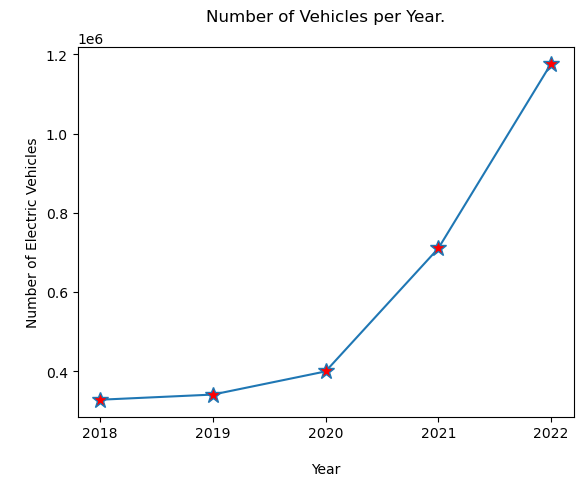

In [58]:
plt.plot(total_vehicles_by_year, marker='*', ms=12, mfc='r')
plt.title("Number of Vehicles per Year.\n")
plt.xlabel('\nYear')
plt.ylabel('\nNumber of Electric Vehicles')
plt.xticks([2018, 2019, 2020, 2021, 2022])
plt.show()

In [11]:
ev_data_complete.groupby('year').agg({'no2 avg': 'mean', 'no2 aqi': 'mean', 'ozone avg': 'mean', 'ozone aqi': 'mean', 'Number of Vehicles': 'sum'})

,no2 avg,no2 aqi,ozone avg,ozone aqi,Number of Vehicles
year,,,,,
2018,11.850309,20.930709,0.031091,44.385364,328690
2019,10.997355,19.971736,0.031014,43.981764,341689
2020,11.200359,20.073355,0.031573,48.893382,400068
2021,10.831145,19.346236,0.031627,44.571259,710444
2022,11.074786,20.447641,0.032964,45.088486,1176011


In [12]:
ev_data_complete.groupby(['year', 'county'])[['no2 avg', 'no2 aqi', 'ozone avg', 'ozone aqi','Number of Vehicles']].mean()

no2 avg    no2 aqi  ozone avg  ozone aqi  \
year county                                                    
2018 Alameda      10.920250  18.948400   0.024200  31.465400   
     Los Angeles  13.676291  23.728673   0.031636  49.359127   
     Orange       15.104450  23.514050   0.027600  39.783550   
     San Diego     7.304517  15.330317   0.034850  43.368883   
     Santa Clara  14.391100  22.553400   0.023300  30.816400   
2019 Alameda       9.852450  17.943550   0.024550  32.239850   
     Los Angeles  12.543000  22.434600   0.031918  49.007191   
     Orange       14.040200  22.403400   0.027750  40.210650   
     San Diego     7.268767  15.168000   0.033683  41.820283   
     Santa Clara  12.570900  20.895700   0.024500  32.697000   
2020 Alameda       9.603100  17.523200   0.024050  31.998650   
     Los Angeles  12.756300  22.498755   0.032955  56.636527   
     Orange       14.455350  22.673350   0.028000  44.651050   
     San Diego     7.717600  15.712333   0.033950  44.354867   
     Santa Clara  11.666100  19.460400   0.024300  33.224000   
2021 Alameda       8.252450  15.409900   0.025250  32.366450   
     Los Angeles  12.823991  22.302773   0.031945  49.482745   
     Orange       14.185850  22.156750   0.027100  38.023150   
     San Diego     6.977650  14.550000   0.035533  43.476517   
     Santa Clara  10.478800  17.853400   0.026500  34.619200   
2022 Alameda       8.868650  15.978600   0.023850  30.554100   
     Los Angeles  12.440764  22.498491   0.033173  49.101773   
     Orange       14.255900  23.461350   0.030950  42.538650   
     San Diego     8.437017  17.676483   0.037350  45.247917   
     Santa Clara   9.925700  17.425900   0.026600  34.154200   

                  Number of Vehicles  
year county                           
2018 Alameda                  8357.0  
     Los Angeles             20876.0  
     Orange                  10908.0  
     San Diego                7515.0  
     Santa Clara             15434.0  
2019 Alameda                  8290.0  
     Los Angeles             22082.0  
     Orange                  11547.0  
     San Diego                7500.0  
     Santa Clara             14113.0  
2020 Alameda                  7492.0  
     Los Angeles             26389.0  
     Orange                  13876.0  
     San Diego                9182.0  
     Santa Clara             11961.0  
2021 Alameda                 11690.0  
     Los Angeles             47634.0  
     Orange                  23509.0  
     San Diego               16335.0  
     Santa Clara             18062.0  
2022 Alameda                 17111.0  
     Los Angeles             81136.0  
     Orange                  37022.0  
     San Diego               24798.0  
     Santa Clara             26461.0

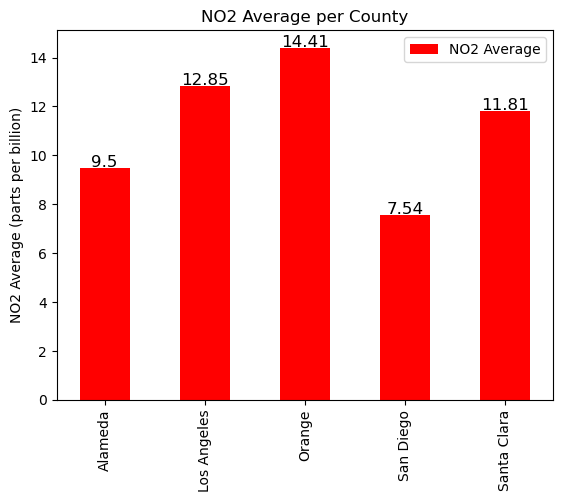

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# group the data by county and calculate the sum of vehicles and mean of no2 avg and ozone avg
county_data = final_data.groupby('county').agg({'Number of Vehicles': 'sum', 'no2 avg': 'mean', 'no2 aqi': 'mean'})

# create the bar chart
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(county_data)))
ax.set_xticklabels(county_data.index.tolist(), rotation=90)
ax.set_ylabel('NO2 Average (parts per billion)')
ax.set_title('NO2 Average per County')
width = 0.5
offset = 0
ax.bar(np.arange(len(county_data)) + offset, county_data['no2 avg'].values, width=width, label='NO2 Average', color='red')
# add numbers on top of the bars
for i, v in enumerate(county_data['no2 avg'].values):
    ax.text(i, v + 0.05, str(round(v,2)), color='black', ha='center', fontsize=12)

ax.legend()
# plt.savefig("output_data/NO2_avg_per_county.png")
# show the plot
plt.show()


In [81]:
import warnings
warnings.filterwarnings('ignore')

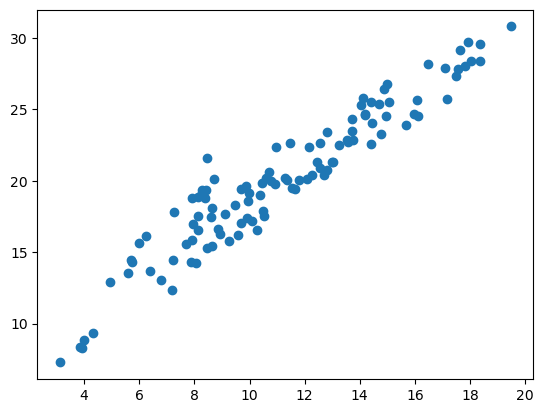

In [83]:
plt.scatter(final_data['no2 avg'], final_data['no2 aqi'])
plt.show()

In [85]:
final_data

,year,no2 avg,no2 aqi,ozone avg,ozone aqi,county,City Name,Number of Vehicles
0,2018,8.8514,16.5973,0.0269,37.1507,Alameda,Livermore,8357
1,2019,7.8973,15.8595,0.0267,37.4274,Alameda,Livermore,8290
2,2020,7.6827,15.5464,0.0265,37.4563,Alameda,Livermore,7492
3,2021,6.4024,13.6630,0.0280,38.4000,Alameda,Livermore,11690
4,2022,7.2281,14.4565,0.0270,36.8777,Alameda,Livermore,17111
...,...,...,...,...,...,...,...,...
105,2018,14.3911,22.5534,0.0233,30.8164,Santa Clara,San Jose,15434
106,2019,12.5709,20.8957,0.0245,32.6970,Santa Clara,San Jose,14113
107,2020,11.6661,19.4604,0.0243,33.2240,Santa Clara,San Jose,11961
108,2021,10.4788,17.8534,0.0265,34.6192,Santa Clara,San Jose,18062


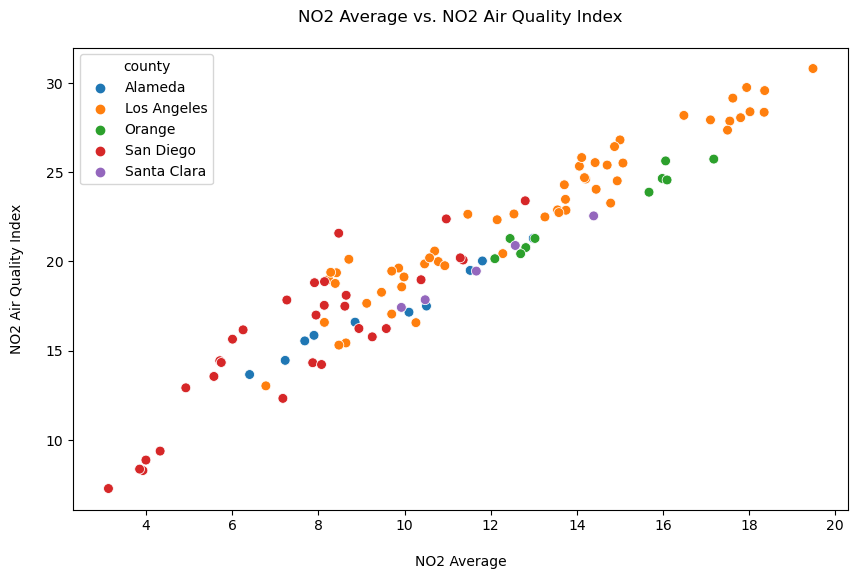

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(final_data['no2 avg'], final_data['no2 aqi'], hue=final_data['county'], s=50)
plt.title('NO2 Average vs. NO2 Air Quality Index\n')
plt.xlabel('\nNO2 Average')
plt.ylabel("NO2 Air Quality Index\n")
plt.show()

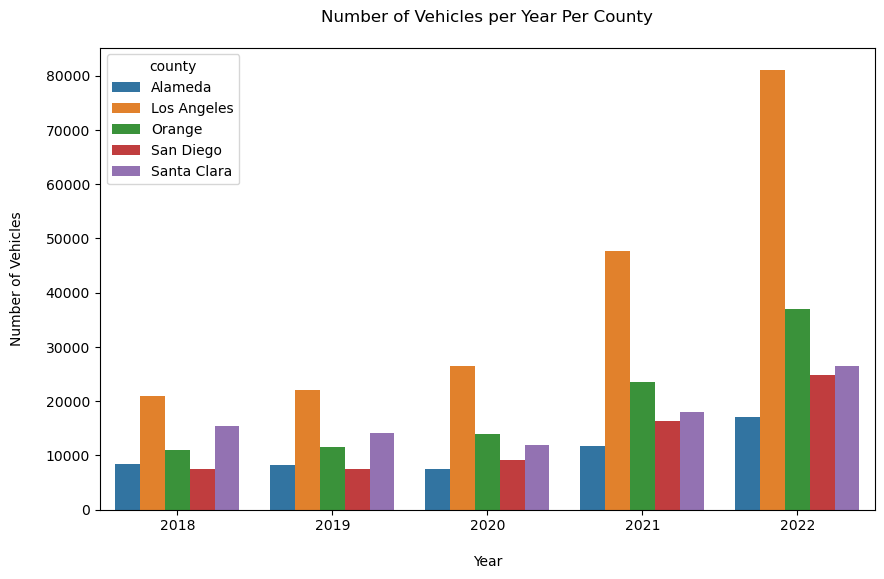

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(final_data['year'], final_data['Number of Vehicles'], hue=final_data['county'])
plt.title('Number of Vehicles per Year Per County\n')
plt.xlabel('\nYear')
plt.ylabel('Number of Vehicles\n')
plt.show()

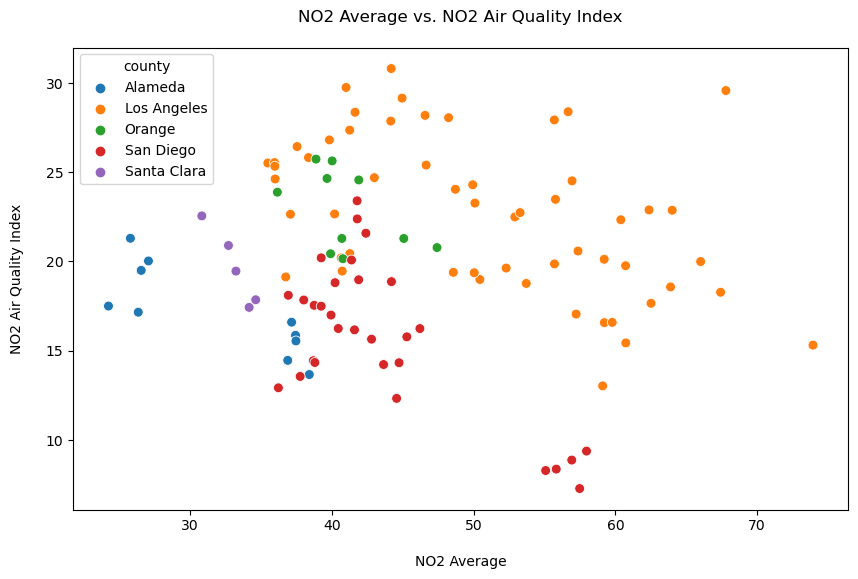

In [119]:
plt.figure(figsize=(10, 6))
sns.scatterplot(final_data['ozone aqi'], final_data['no2 aqi'], hue=final_data['county'], s=50)
plt.title('NO2 Average vs. NO2 Air Quality Index\n')
plt.xlabel('\nNO2 Average')
plt.ylabel("NO2 Air Quality Index\n")
plt.show()

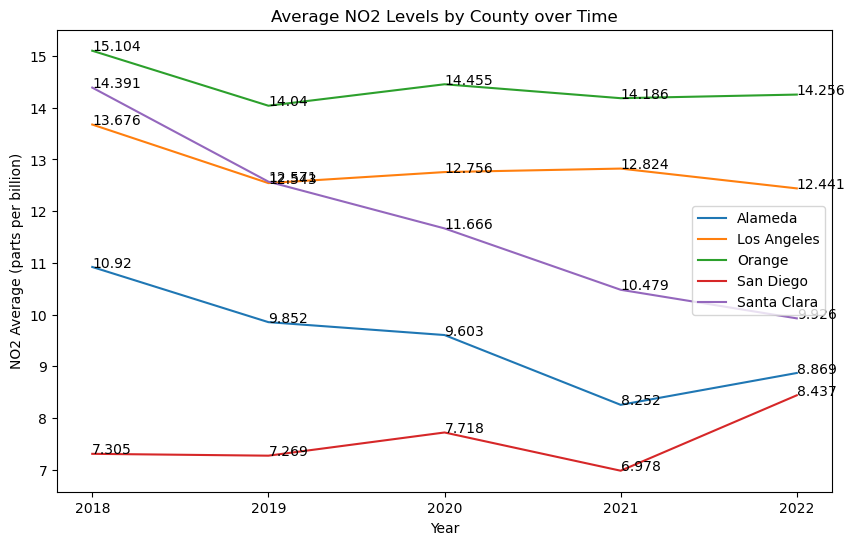

In [14]:
county_data = ev_data_complete.groupby(['year', 'county'])[['no2 avg', 'Number of Vehicles']].mean()
county_data = county_data.reset_index()
pivot_data = pd.pivot_table(county_data, values='no2 avg', index='year', columns='county')
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(ax=ax, legend=False)
ax.set_xlabel('Year')
ax.set_ylabel('NO2 Average (parts per billion)')
ax.set_title('Average NO2 Levels by County over Time')
ax.set_xticks(pivot_data.index[::1])
for col in pivot_data.columns:
    for i, val in pivot_data[col].items():
        ax.text(i, val, str(round(val, 3)))
plt.legend()
plt.savefig("output_data/NO2_avg_per_county_per_year.png")
plt.show()

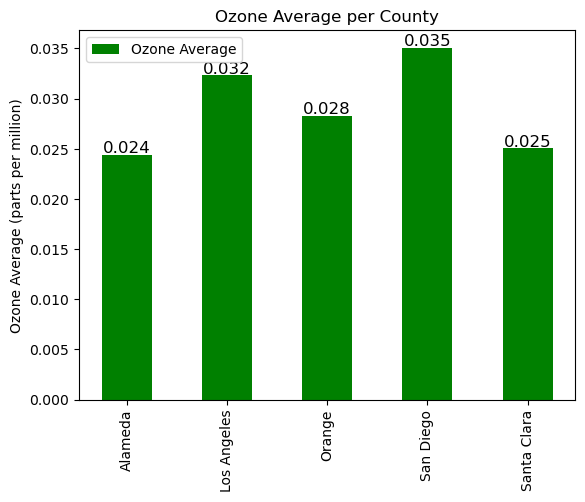

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# group the data by county and calculate the sum of vehicles and mean of no2 avg and ozone avg
county_data = ev_data_complete.groupby('county').agg({'Number of Vehicles': 'sum', 'no2 avg': 'mean', 'ozone avg': 'mean'})

# create the bar chart
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(county_data)))
ax.set_xticklabels(county_data.index.tolist(), rotation=90)
ax.set_ylabel('Ozone Average (parts per million)')
ax.set_title('Ozone Average per County')
width = 0.5
offset = 0
ax.bar(np.arange(len(county_data)) + offset, county_data['ozone avg'].values, width=width, label='Ozone Average', color='green')

# add numbers on top of the bars
for i, v in enumerate(county_data['ozone avg'].values):
    ax.text(i, v + 0.0002, '{:,.3f}'.format(v), color='black', ha='center', fontsize=12)

ax.legend()
plt.savefig("output_data/ozone_avg_per_county.png")
# show the plot
plt.show()


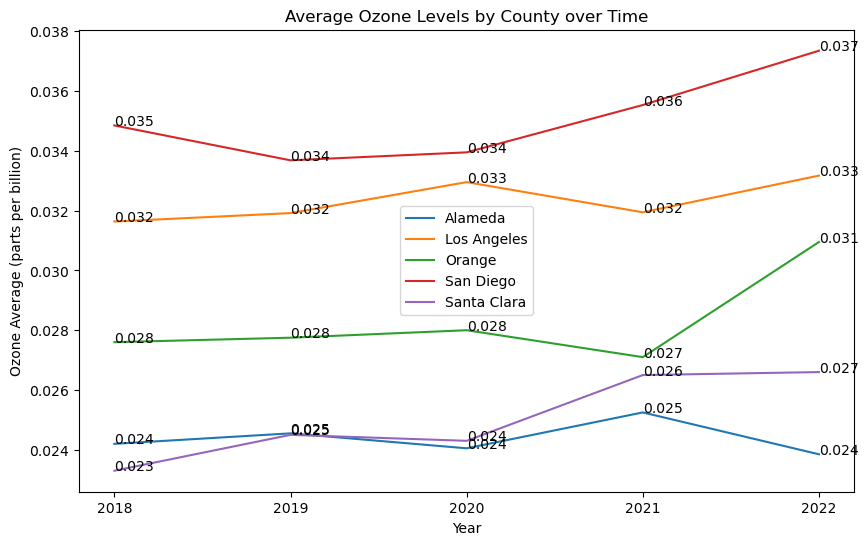

In [16]:
county_data = ev_data_complete.groupby(['year', 'county'])[['ozone avg', 'Number of Vehicles']].mean()
county_data = county_data.reset_index()
pivot_data = pd.pivot_table(county_data, values='ozone avg', index='year', columns='county')
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(ax=ax, legend=False)
ax.set_xlabel('Year')
ax.set_ylabel('Ozone Average (parts per billion)')
ax.set_title('Average Ozone Levels by County over Time')
ax.set_xticks(pivot_data.index[::1])
for col in pivot_data.columns:
    for i, val in pivot_data[col].items():
        ax.text(i, val, str(round(val, 3)))
        
plt.legend()
plt.savefig("output_data/ozone_avg_per_county_per_year.png")
plt.show()

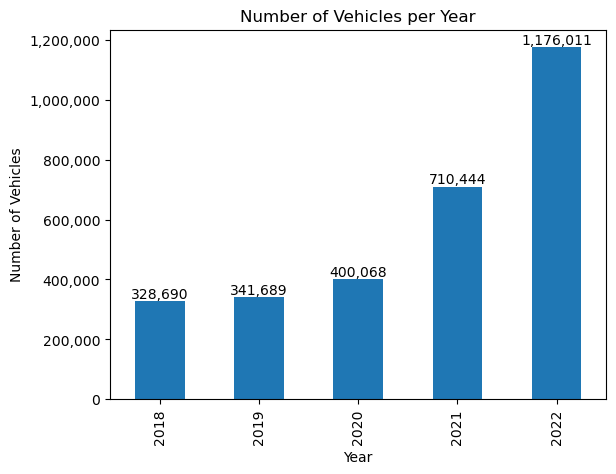

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

vehicles_per_year = ev_data_complete.groupby('year')['Number of Vehicles'].sum()
ax = vehicles_per_year.plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles per Year')

# add numbers on top of the bars
for i, v in enumerate(vehicles_per_year):
    ax.text(i, v + 10000, f'{v:,.0f}', color='black', ha='center', fontsize=10)

plt.savefig("output_data/num_ev_per_year.png")
plt.show()

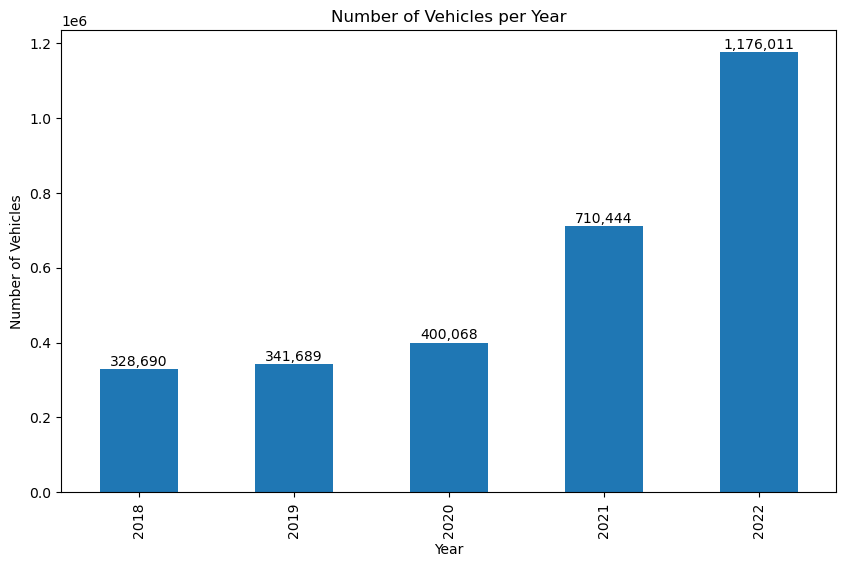

In [132]:
plt.figure(figsize =(10, 6))
final_data.groupby('year')['Number of Vehicles'].sum().plot(kind='bar')

for i, v in enumerate(final_data.groupby('year')['Number of Vehicles'].sum()):
    plt.text(i, v + 10000, f'{v:,.0f}', color='black', ha='center', fontsize=10)

plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles per Year')
plt.show()

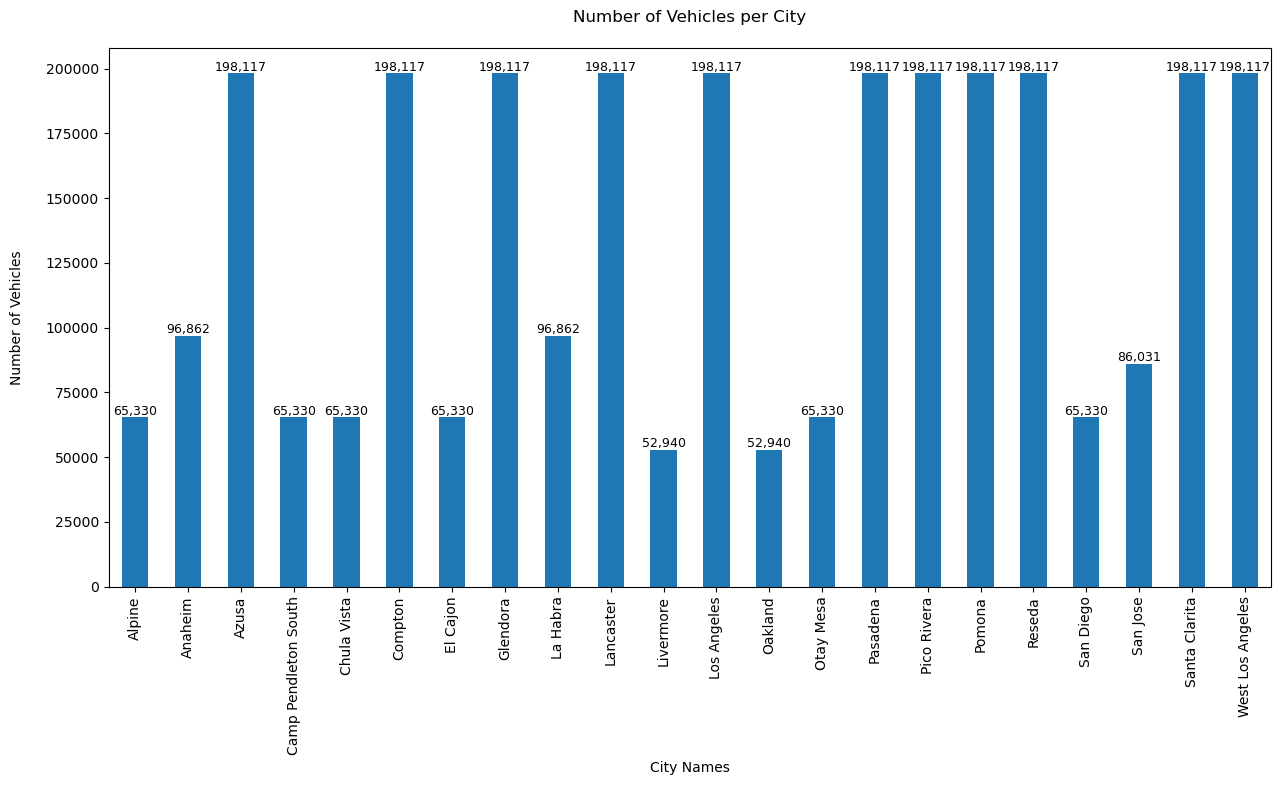

In [155]:
plt.figure(figsize =(15, 7))
final_data.groupby('City Name')['Number of Vehicles'].sum().plot(kind='bar')

for i, v in enumerate(final_data.groupby('City Name')['Number of Vehicles'].sum()):
    plt.text(i, v + 1000, f'{v:,.0f}', color='black', ha='center', fontsize=9)
    
plt.xlabel('City Names')
plt.ylabel('Number of Vehicles\n')
plt.title('Number of Vehicles per City\n')
plt.show()

In [133]:
final_data

,year,no2 avg,no2 aqi,ozone avg,ozone aqi,county,City Name,Number of Vehicles
0,2018,8.8514,16.5973,0.0269,37.1507,Alameda,Livermore,8357
1,2019,7.8973,15.8595,0.0267,37.4274,Alameda,Livermore,8290
2,2020,7.6827,15.5464,0.0265,37.4563,Alameda,Livermore,7492
3,2021,6.4024,13.6630,0.0280,38.4000,Alameda,Livermore,11690
4,2022,7.2281,14.4565,0.0270,36.8777,Alameda,Livermore,17111
...,...,...,...,...,...,...,...,...
105,2018,14.3911,22.5534,0.0233,30.8164,Santa Clara,San Jose,15434
106,2019,12.5709,20.8957,0.0245,32.6970,Santa Clara,San Jose,14113
107,2020,11.6661,19.4604,0.0243,33.2240,Santa Clara,San Jose,11961
108,2021,10.4788,17.8534,0.0265,34.6192,Santa Clara,San Jose,18062


In [157]:
final_data.describe(include='all')

,year,no2 avg,no2 aqi,ozone avg,ozone aqi,county,City Name,Number of Vehicles
count,110.000000,110.000000,110.000000,110.000000,110.000000,110,110,110.000000
unique,NaN,NaN,NaN,NaN,NaN,5,22,NaN
top,NaN,NaN,NaN,NaN,NaN,Los Angeles,Livermore,NaN
freq,NaN,NaN,NaN,NaN,NaN,55,5,NaN
mean,2020.000000,11.190791,20.153935,0.031654,45.384051,NaN,NaN,26880.927273
std,1.420686,3.800367,5.024940,0.005272,10.280982,NaN,NaN,21368.413962
min,2018.000000,3.124500,7.273300,0.020700,24.230500,NaN,NaN,7492.000000
25%,2019.000000,8.397875,17.008775,0.027850,38.470900,NaN,NaN,11582.750000
50%,2020.000000,10.741500,20.011000,0.031400,41.886600,NaN,NaN,21479.000000
75%,2021.000000,14.099800,23.782125,0.034875,53.595050,NaN,NaN,26389.000000


In [159]:
los_angeles     = final_data[final_data.county == 'Los Angeles']
not_los_angeles = final_data[final_data.county != 'Los Angeles']

In [160]:
not_los_angeles

,year,no2 avg,no2 aqi,ozone avg,ozone aqi,county,City Name,Number of Vehicles
0,2018,8.8514,16.5973,0.0269,37.1507,Alameda,Livermore,8357
1,2019,7.8973,15.8595,0.0267,37.4274,Alameda,Livermore,8290
2,2020,7.6827,15.5464,0.0265,37.4563,Alameda,Livermore,7492
3,2021,6.4024,13.6630,0.0280,38.4000,Alameda,Livermore,11690
4,2022,7.2281,14.4565,0.0270,36.8777,Alameda,Livermore,17111
5,2018,12.9891,21.2995,0.0215,25.7801,Alameda,Oakland,8357
6,2019,11.8076,20.0276,0.0224,27.0523,Alameda,Oakland,8290
7,2020,11.5235,19.5000,0.0216,26.5410,Alameda,Oakland,7492
8,2021,10.1025,17.1568,0.0225,26.3329,Alameda,Oakland,11690
9,2022,10.5092,17.5007,0.0207,24.2305,Alameda,Oakland,17111


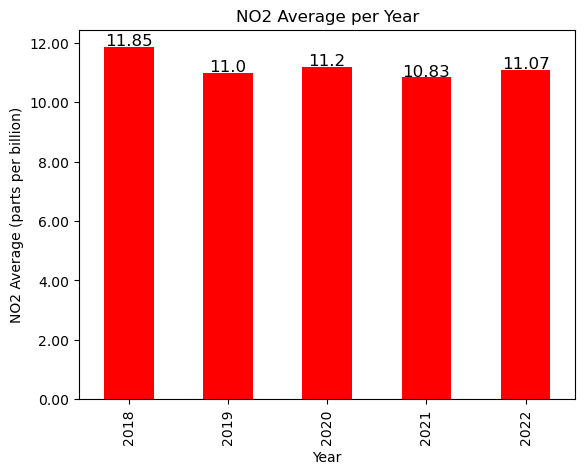

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

no2_avg_per_year = ev_data_complete.groupby('year')['no2 avg'].mean()
ax = no2_avg_per_year.plot(kind='bar', color='red')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))
plt.xlabel('Year')
plt.ylabel('NO2 Average (parts per billion)')
plt.title('NO2 Average per Year')

# add numbers on top of the bars
for i, v in enumerate(no2_avg_per_year.values):
    ax.text(i, v + 0.05, str(round(v,2)), color='black', ha='center', fontsize=12)

plt.savefig("output_data/no2_per_year.png")
plt.show()

The r value is: -0.6923089216669938


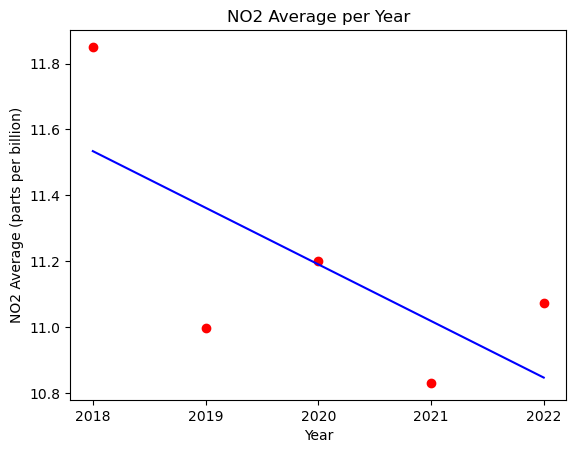

In [19]:
import numpy as np
from scipy import stats

no2_avg_per_year = ev_data_complete.groupby('year')['no2 avg'].mean()

# perform linear regression
x = np.arange(len(no2_avg_per_year))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, no2_avg_per_year)
xticks = [2018, 2019, 2020, 2021, 2022]
# plot data and regression line
plt.scatter(x, no2_avg_per_year, color='red')
plt.plot(x, intercept + slope*x, color='blue')
plt.xticks(range(len(xticks)), xticks)
plt.xlabel('Year')
plt.ylabel('NO2 Average (parts per billion)')
plt.title('NO2 Average per Year')
print(f"The r value is: {r_value}")

plt.savefig("output_data/no2_per_year_regress.png")

plt.show()


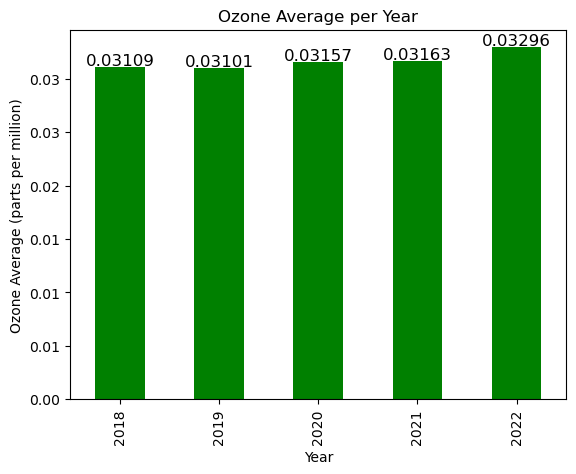

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ozone_avg_per_year = ev_data_complete.groupby('year')['ozone avg'].mean()
ax = ozone_avg_per_year.plot(kind='bar', color='green')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))
plt.xlabel('Year')
plt.ylabel('Ozone Average (parts per million)')
plt.title('Ozone Average per Year')

# add numbers on top of the bars
for i, v in enumerate(ozone_avg_per_year.values):
    ax.text(i, v + 0.0002, str(round(v,5)), color='black', ha='center', fontsize=12)

plt.savefig("output_data/ozone_per_year.png")
plt.show()


The r value is: 0.8807406606421045


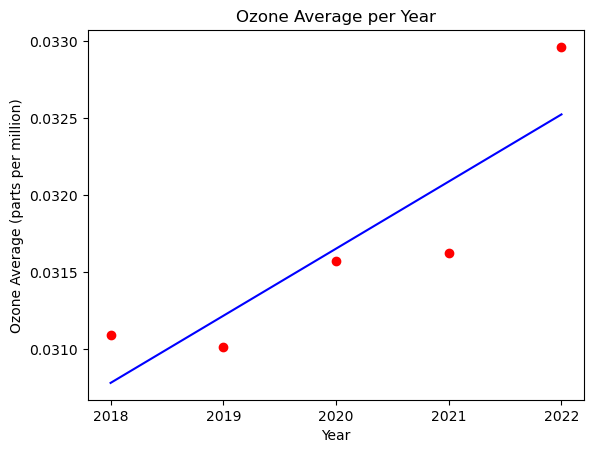

In [21]:
ozone_avg_per_year = ev_data_complete.groupby('year')['ozone avg'].mean()

# perform linear regression
x = np.arange(len(ozone_avg_per_year))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, ozone_avg_per_year)
xticks = [2018, 2019, 2020, 2021, 2022]
# plot data and regression line
plt.scatter(x, ozone_avg_per_year, color='red')
plt.plot(x, intercept + slope*x, color='blue')
plt.xticks(range(len(xticks)), xticks)
plt.xlabel('Year')
plt.ylabel('Ozone Average (parts per million)')
plt.title('Ozone Average per Year')
print(f"The r value is: {r_value}")
plt.savefig("output_data/ozone_per_year_regress.png")
plt.show()